In [2]:
import numpy as np
import pandas as pd
!pip install chardet
import seaborn as sns
import chardet
import matplotlib.pyplot as plt

In [3]:
with open('spam.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

In [4]:
df = pd.read_csv('spam.csv', encoding=encoding)

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [8]:
df.rename({'v1':'target','v2':'text'},axis=1,inplace=True)

In [9]:
df['target']=df['target'].map({'ham':0,'spam':1})

In [10]:
df['target'].value_counts()

target
0    4825
1     747
Name: count, dtype: int64

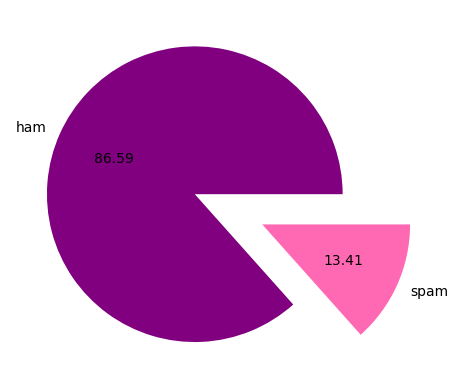

In [11]:
explode = [0, 0.5] 
mycolors = ["purple", "hotpink"]
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f", explode=explode, colors = mycolors)
plt.show()

In [13]:
X=df.iloc[:,-1]
y=df.iloc[:,0]

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [16]:
from sklearn.pipeline import Pipeline
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [17]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [18]:
from sklearn.metrics import classification_report, accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.9829596412556054
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       963
           1       0.94      0.93      0.94       152

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



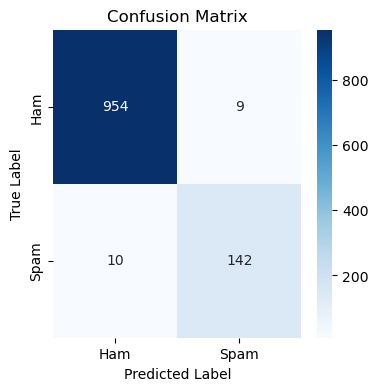

In [19]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
clf2 = Pipeline([ 
    ('vectorizer', TfidfVectorizer()),     
    ('classifier', MultinomialNB())   
])

In [22]:
clf2.fit(X_train,y_train)
y_pred2 = clf2.predict(X_test)

In [23]:
from sklearn.metrics import classification_report, accuracy_score

accuracy = accuracy_score(y_test, y_pred2)
print(f'Accuracy: {accuracy}')

report = classification_report(y_test, y_pred2)
print(report)

Accuracy: 0.957847533632287
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       963
           1       1.00      0.69      0.82       152

    accuracy                           0.96      1115
   macro avg       0.98      0.85      0.90      1115
weighted avg       0.96      0.96      0.95      1115



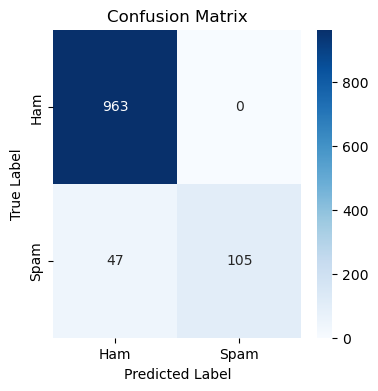

In [24]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred2)


plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()